In [15]:
#Libraries to be imported 
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind
import pingouin
from scipy.stats import shapiro ## To check the normality
from scipy.stats import kruskal ## Used for non parametric testing!
from statsmodels.formula.api import ols

In [16]:
### Data which will be used in the whole Hypothesis Testing 
data = pd.read_csv('cleaned.csv')
labels = ['10-19','20-29','30-39','40-49','50-59','60-69','70-79'] ## Age Groups 
bins = [10, 20, 30, 40, 50, 60, 70, 80] ## Age 
data['AgeRange'] = pd.cut(data['Age'], bins = bins,labels=labels )
data.head(5)

,Unnamed: 0,index,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,...,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level,GenderBinary,AgeRange
0,0,0,33,Male,2,4,5,4,3,2,...,2,2,3,1,2,3,4,Low,1,30-39
1,1,1,17,Male,3,1,5,3,4,2,...,7,8,6,2,1,7,2,Medium,1,10-19
2,2,2,35,Male,4,5,6,5,5,4,...,9,2,1,4,6,7,2,High,1,30-39
3,3,3,37,Male,7,7,7,7,6,7,...,3,1,4,5,6,7,5,High,1,30-39
4,4,4,46,Male,6,8,7,7,7,6,...,4,1,4,2,4,2,3,High,1,40-49


## Introduction to Hypothesis Testing

### Lung cancer remains one of the most serious diseases affecting millions of people worldwide. While there are many known causes, there are also countless myths and assumptions surrounding its risk factors. The best way to separate fact from fiction is through data — and that’s where hypothesis testing comes in.

### In this section, we’ll dive into statistically grounded questions to explore whether patterns observed in the data truly hold up. Let’s challenge some assumptions with real evidence.

---


## Null Hypothesis: Smoking Vs Severity 
### Do patients with high severity have significantly higher average smoking scores than those with low severity?

In [17]:
smokingSeverity = data[['Smoking', 'Level']] ## Data to be used!
stats, pValue = shapiro(smokingSeverity['Smoking']) ## Since the pValue is less than 0.05 it is not normal so we use Non Parametric Testing. 
low = smokingSeverity[smokingSeverity['Level'] == 'Low']['Smoking']
high = smokingSeverity[smokingSeverity['Level'] == 'Medium']['Smoking']
medium = smokingSeverity[smokingSeverity['Level'] == 'High']['Smoking']

stats, pValue = kruskal(low,high,medium)
print(pValue) ## pValue is less than 0.05 that means we reject the null hypothesis! 

1.376250887888775e-82


### Since the p-value is less than 0.05, we reject the null hypothesis and accept the alternative hypothesis: there is a significant difference in smoking scores across different severity levels.

### Let's see the visual proof !

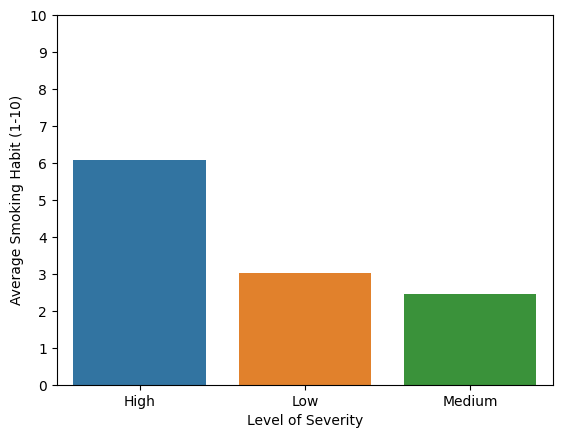

In [18]:
averageSmokingScores = smokingSeverity.groupby('Level').mean().reset_index()
sns.barplot(x = 'Level', y = 'Smoking', hue = 'Level', data = averageSmokingScores)
plt.ylim(0,10)
plt.yticks(np.arange(0,11,1))
plt.ylabel("Average Smoking Habit (1-10)")
plt.xlabel("Level of Severity")
plt.show()


### Hence we can say that SMOKING DOES HAVE SOME EFFECT IN THE LUNG CANCER PATIENTS!!!

---

## Alcohol and Smoking vs Severity 
### Null Hypothesis: Does Does the combination of heavy smoking and heavy alcohol use lead to higher severity compared to either alone?

In [19]:
smokingAlcoholData = data[['Smoking', 'Alcohol use', 'Level']]
### Lets check the normality test
stats1,pValue1 = shapiro(data['Smoking']) ## P-value < 0.05 so the data is not normal
stats2,pValue2 = shapiro(data['Alcohol use']) ## P-value < 0.05 so the data is not normal
print(pValue1,pValue2)

6.95490898649368e-30 1.383405202809842e-28


In [20]:
##Lets do non parametric testing
data['Smoking_Level'] = pd.cut(data['Smoking'], bins = [0,4,7,10], labels=['Low','Medium','High'])
data['Alcohol_Level'] = pd.cut(data['Alcohol use'], bins = [0,4,7,10], labels=['Low','Medium','High'])
data['Combined_Level'] = data['Smoking_Level'].astype(str) + "_" + data['Alcohol_Level'].astype(str)
level_map = {'Low': 1, 'Medium': 2, 'High': 3}
data['Severity_Score'] = data['Level'].map(level_map)
grouppedData = data.groupby("Combined_Level")['Severity_Score'].apply(list)
stats,pValues = kruskal(*grouppedData)
print(pValues) ##pValue is less than 0.05 which means we reject the null hypothesis 

1.6902646821042064e-144


### Hence we reject the null hypothesis and accept the alternative hypothesis stating - This indicates that the severity of lung cancer significantly varies across different combinations of smoking and alcohol consumption levels. Certain combinations — such as high smoking and high alcohol use — may be associated with higher severity, confirming an interaction-like effect between these lifestyle risk factors.

---

## Weight Loss vs Severity 
### Null Hypothesis: Lung Cancer doesnot decrease the weight 


In [21]:
weightData = data[['Weight Loss', 'Level']]
## Lets do the normality test first 
stats,pval = shapiro(weightData['Weight Loss'])## pVal is less than 0.05 so we adhere to non parametric testing 
lowWeight = weightData[weightData['Level'] == 'Low']['Weight Loss']
mediumWeight = weightData[weightData['Level'] == 'Medium']['Weight Loss']
highWeight = weightData[weightData['Level'] == 'High']['Weight Loss']
stats,pValue = kruskal(lowWeight, mediumWeight, highWeight)
print(pValue) ## Since pValue is less than 0.05 we confirm that there is relation between the lung cancer and weight 


5.355200517518678e-38


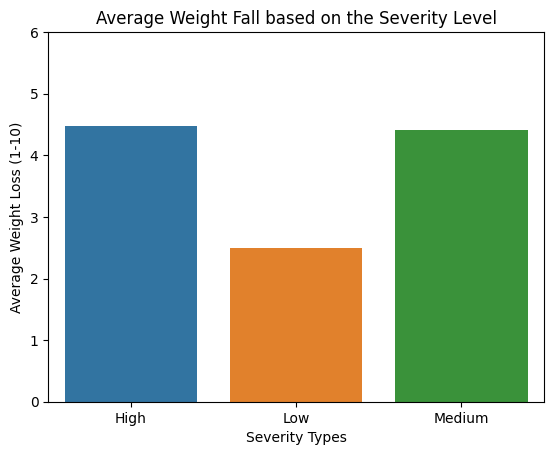

In [22]:
### Visual Proof 
weightLoss = weightData.groupby('Level')['Weight Loss'].mean().reset_index()
sns.barplot(x = 'Level', y = 'Weight Loss',hue = 'Level', data = weightLoss)
plt.ylim(0,6)
plt.xlabel('Severity Types')
plt.ylabel('Average Weight Loss (1-10)')
plt.title('Average Weight Fall based on the Severity Level')
plt.show()

### Hence from the graph and the pValue we can reject null hypothesis and accept the alternative hypothesis -At least one severity level is associated with a significantly different weight loss score. In other words, Lung Cancer does affect weight loss.



---

## Genetic History vs Severity !
### Null Hypothesis : Genetic risk scores are not significantly different across severity levels of lung cancer. 

In [23]:
geneticRisk = data[['Genetic Risk', 'Level']]
##Normality Test
stats,pValue = shapiro(data['Genetic Risk']) ## pValue < 0.05 which means we reject the null hypothesis
lowGenetic = geneticRisk[geneticRisk['Level'] == 'Low']['Genetic Risk']
mediumGenetic = geneticRisk[geneticRisk['Level'] == 'Medium']['Genetic Risk']
highGenetic = geneticRisk[geneticRisk['Level'] == 'High']['Genetic Risk']
stats,pValue = kruskal(lowGenetic,mediumGenetic,highGenetic)
print(pValue) ##p-Value is less than 0.05 which means we reject the null hypothesis 



7.598839972383025e-100


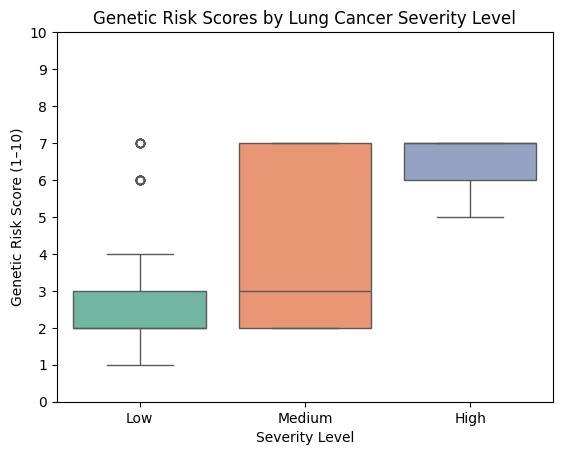

In [24]:
sns.boxplot(x = 'Level', y ='Genetic Risk', hue = 'Level',data = geneticRisk, palette='Set2')
plt.ylim(0,10)
plt.yticks(np.arange(0,11,1))
plt.title('Genetic Risk Scores by Lung Cancer Severity Level')
plt.xlabel('Severity Level')
plt.ylabel('Genetic Risk Score (1–10)')
plt.show()

### From the boxplot and the pValue derived from the kruskal test we can reject the null hypothesis and accept the alternative hypothesis - At least one severity level shows a different genetic risk score distribution.

---

## Chronic Lung Disease Vs High Severity 
### Null Hypothesis: There is no significant difference in chronic lung disease scores across the severity levels of lung cancer.

In [25]:
lungSeverity = data[['chronic Lung Disease', 'Level']]
###Normality test
stats,Pvalue = shapiro(data['chronic Lung Disease']) ##p<0.05 which means we do the non parametric test(Kruskal Test)
highLung = lungSeverity[lungSeverity['Level'] == 'High']['chronic Lung Disease']
mediumLung = lungSeverity[lungSeverity['Level'] == 'Medium']['chronic Lung Disease']
lowLung = lungSeverity[lungSeverity['Level'] == 'Low']['chronic Lung Disease']

stats,pValues = kruskal(highLung, mediumLung, lowLung)
print(pValues) ##pValue is less than 0.05 which means we reject the null hypothesis


5.120733901301346e-86


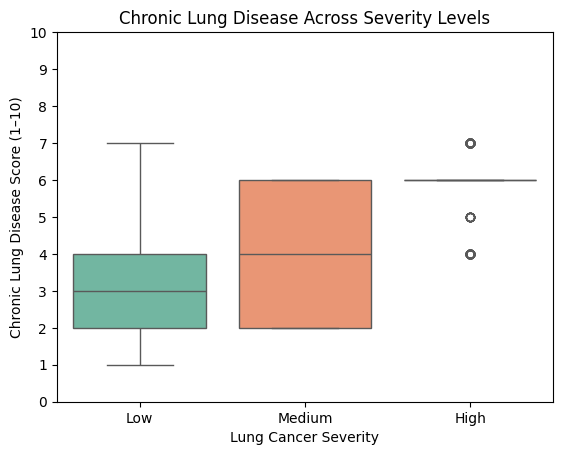

In [26]:
## Visual Proof 
sns.boxplot(x = 'Level', y = 'chronic Lung Disease',hue = 'Level', data = lungSeverity, palette='Set2')
plt.title("Chronic Lung Disease Across Severity Levels")
plt.ylabel("Chronic Lung Disease Score (1–10)")
plt.xlabel("Lung Cancer Severity")
plt.ylim(0,10)
plt.yticks(np.arange(0,11,1))
plt.show()

### As seen in the boxplot and pValue derived from the kruskal test we can reject the null hypothesis and accept the alternative hypothesis - There is no significant difference in chronic lung disease scores across the severity levels of lung cancer.

---

## Age Group Vs Smoking 
### Null Hypothesis: There is no significant difference in average smoking scores across different age groups.

In [27]:
##Are Younger Patients (Age 30–40) More Likely to Be High-Risk Smokers?
youngSmokers = data[['AgeRange', 'Smoking']]
##Lets check the normality test for the whole thing 
stats,pValue = shapiro(data['Smoking']) ### Since pValue is less than 0.05 we go with the non parametric testing
grouppedData = data.groupby('AgeRange', observed= False)['Smoking'].apply(list)
stats,pValue = kruskal(*grouppedData) ##Since the pValue is less than 0.05 we reject the null hypothesis
print(pValue)


5.3241699586255e-05


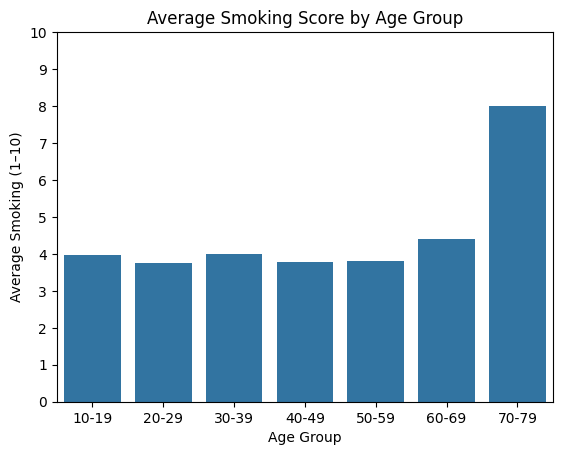

In [28]:
## Visual Proof 
youngSmoking = youngSmokers.groupby('AgeRange', observed=False)['Smoking'].mean().reset_index()
sns.barplot(x='AgeRange', y='Smoking', data=youngSmoking)
plt.title("Average Smoking Score by Age Group")
plt.ylabel("Average Smoking (1–10)")
plt.xlabel("Age Group")
plt.ylim(0, 10)
plt.yticks(np.arange(0,11,1))
plt.show()

### As seen in the barplot and pValue derived from the kruskal test we can reject the null hypothesis and accept the alternative hypothesis - There is a significant difference in average smoking scores between at least two age groups.